In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
fg = pd.read_csv("./datasets/fingrid_2023_3min.csv", sep=",", parse_dates=["Alkuaika UTC"])
fg

,Alkuaika UTC,Loppuaika UTC,Tuulivoimatuotanto - reaaliaikatieto,Lämpötila Helsingissä - reaaliaikatieto,Taajuus - reaaliaikatieto,Ydinvoimatuotanto - reaaliaikatieto,Vesivoimatuotanto - reaaliaikatieto,Sähköntuotanto Suomessa - reaaliaikatieto,"Sähköntuotanto, yli/alijäämä - reaaliaikatieto",Sähkönkulutus Suomessa - reaaliaikatieto
0,2022-12-31 22:01:00+00:00,2022-12-31T22:01:00.000Z,3533.50000,4.4004,49.96800,4374.80000,624.99000,10671.0,423.19999,9333.7
1,2022-12-31 22:04:00+00:00,2022-12-31T22:04:00.000Z,3528.50000,4.4004,49.99400,4371.00000,649.50000,10690.0,418.69999,9407.0
2,2022-12-31 22:07:00+00:00,2022-12-31T22:07:00.000Z,3518.59999,4.4004,49.98499,4369.19999,658.00000,10690.0,427.50000,9401.0
3,2022-12-31 22:10:00+00:00,2022-12-31T22:10:00.000Z,3536.50000,4.4004,50.01500,4368.80000,652.16999,10693.0,419.19999,9409.6
4,2022-12-31 22:13:00+00:00,2022-12-31T22:13:00.000Z,3525.00000,4.4004,50.00200,4365.30000,641.34000,10662.0,403.10000,9400.0
...,...,...,...,...,...,...,...,...,...,...
175959,2023-12-31 21:46:00+00:00,2023-12-31T21:46:00.000Z,2211.00000,-19.7880,49.98400,4351.69999,1373.20000,10534.0,257.80000,12605.0
175960,2023-12-31 21:49:00+00:00,2023-12-31T21:49:00.000Z,2197.50000,-19.7880,49.95400,4350.00000,1427.00000,10567.0,324.80000,12589.0
175961,2023-12-31 21:52:00+00:00,2023-12-31T21:52:00.000Z,2175.00000,-19.7880,49.96399,4353.00000,1438.30000,10564.0,280.80000,12586.0
175962,2023-12-31 21:55:00+00:00,2023-12-31T21:55:00.000Z,2168.00000,-19.7880,50.01400,4350.50000,1433.90000,10555.0,289.10000,12596.0


In [16]:
fg2 = fg.copy()
fg2 = fg2.set_index("Alkuaika UTC")
fg2 = fg2.drop(columns=["Loppuaika UTC"])

fg2 = fg2.dropna(axis=0)
print("NA dropped:", len(fg)-len(fg2))

cols = pd.Series([c.replace(" - reaaliaikatieto", "") for c in fg2.columns])
fg2.columns = cols.copy()
cols[[0,1,2,7]] = cols[[1,7,0,2]]
fg2 = fg2[cols]
fg2

NA dropped: 101


,Lämpötila Helsingissä,Sähkönkulutus Suomessa,Tuulivoimatuotanto,Ydinvoimatuotanto,Vesivoimatuotanto,Sähköntuotanto Suomessa,"Sähköntuotanto, yli/alijäämä",Taajuus
Alkuaika UTC,,,,,,,,
2022-12-31 22:01:00+00:00,4.4004,9333.7,3533.50000,4374.80000,624.99000,10671.0,423.19999,49.96800
2022-12-31 22:04:00+00:00,4.4004,9407.0,3528.50000,4371.00000,649.50000,10690.0,418.69999,49.99400
2022-12-31 22:07:00+00:00,4.4004,9401.0,3518.59999,4369.19999,658.00000,10690.0,427.50000,49.98499
2022-12-31 22:10:00+00:00,4.4004,9409.6,3536.50000,4368.80000,652.16999,10693.0,419.19999,50.01500
2022-12-31 22:13:00+00:00,4.4004,9400.0,3525.00000,4365.30000,641.34000,10662.0,403.10000,50.00200
...,...,...,...,...,...,...,...,...
2023-12-31 21:46:00+00:00,-19.7880,12605.0,2211.00000,4351.69999,1373.20000,10534.0,257.80000,49.98400
2023-12-31 21:49:00+00:00,-19.7880,12589.0,2197.50000,4350.00000,1427.00000,10567.0,324.80000,49.95400
2023-12-31 21:52:00+00:00,-19.7880,12586.0,2175.00000,4353.00000,1438.30000,10564.0,280.80000,49.96399


In [17]:
fg2.dtypes

Lämpötila Helsingissä           float64
Sähkönkulutus Suomessa          float64
Tuulivoimatuotanto              float64
Ydinvoimatuotanto               float64
Vesivoimatuotanto               float64
Sähköntuotanto Suomessa         float64
Sähköntuotanto, yli/alijäämä    float64
Taajuus                         float64
dtype: object

array([<AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>], dtype=object)

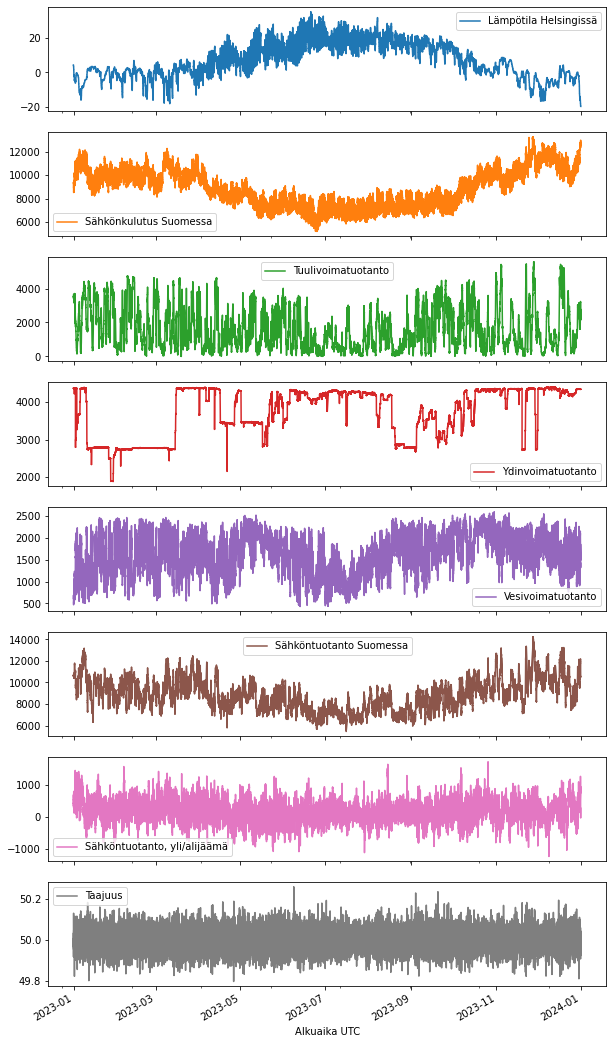

In [18]:
fg2.plot(subplots=True, figsize=(10,20))

In [19]:
fg2.to_csv('./datasets/preprocessed/fingrid_2023_3min.csv', index=False)

In [20]:
fg3 = fg2.resample("1d").mean()
fg3

,Lämpötila Helsingissä,Sähkönkulutus Suomessa,Tuulivoimatuotanto,Ydinvoimatuotanto,Vesivoimatuotanto,Sähköntuotanto Suomessa,"Sähköntuotanto, yli/alijäämä",Taajuus
Alkuaika UTC,,,,,,,,
2022-12-31 00:00:00+00:00,3.925729,9124.619997,3467.112500,4371.289997,634.115747,10614.075000,497.609996,49.986346
2023-01-01 00:00:00+00:00,-1.901170,9453.016872,3427.742916,4362.274164,769.556038,10916.577083,448.857912,49.998537
2023-01-02 00:00:00+00:00,-3.785417,10540.885416,1851.952895,3811.188955,1440.665102,10094.650623,580.522163,49.999500
2023-01-03 00:00:00+00:00,-0.868412,10727.212499,478.378395,3748.893539,1538.675186,9310.661664,388.607672,49.996785
2023-01-04 00:00:00+00:00,-4.153137,11060.721458,1958.387500,3606.277497,1257.733686,10260.980416,847.963122,49.998254
...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00+00:00,-4.851895,10706.047916,596.164645,4229.294788,1797.314790,8935.723122,186.577544,49.997546
2023-12-28 00:00:00+00:00,-2.438772,10984.528125,806.981374,4290.099788,1675.914541,8996.859164,75.787902,50.006408
2023-12-29 00:00:00+00:00,-0.234560,11290.597077,1900.858663,4351.753859,1502.548392,9754.259914,80.904164,49.989954


array([<AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>], dtype=object)

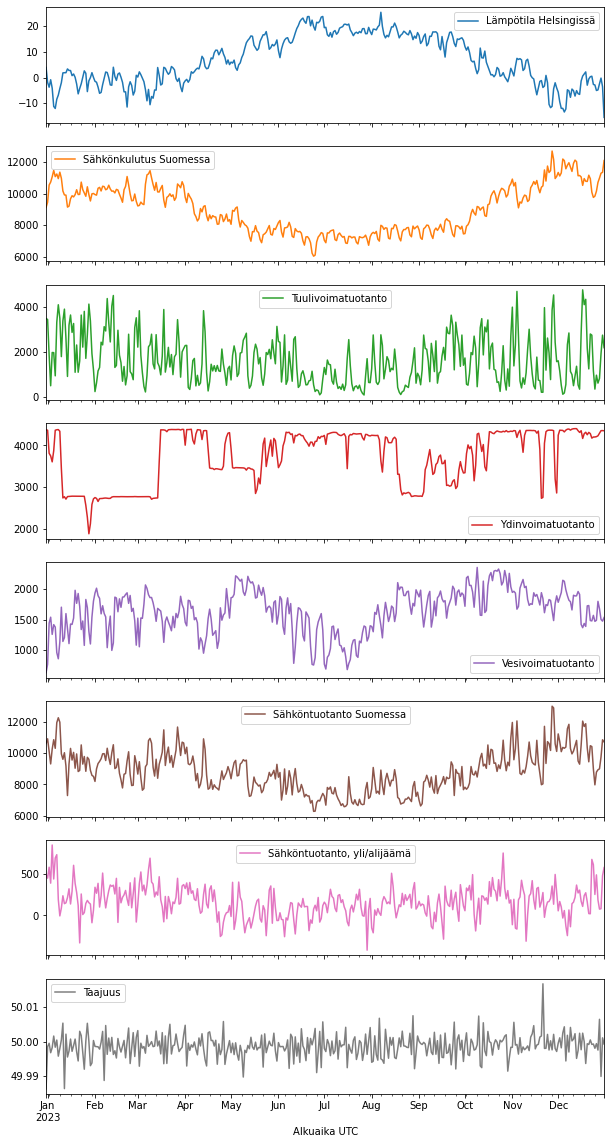

In [21]:
fg3.plot(subplots=True, figsize=(10,20))

array([<AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>,
       <AxesSubplot:xlabel='Alkuaika UTC'>], dtype=object)

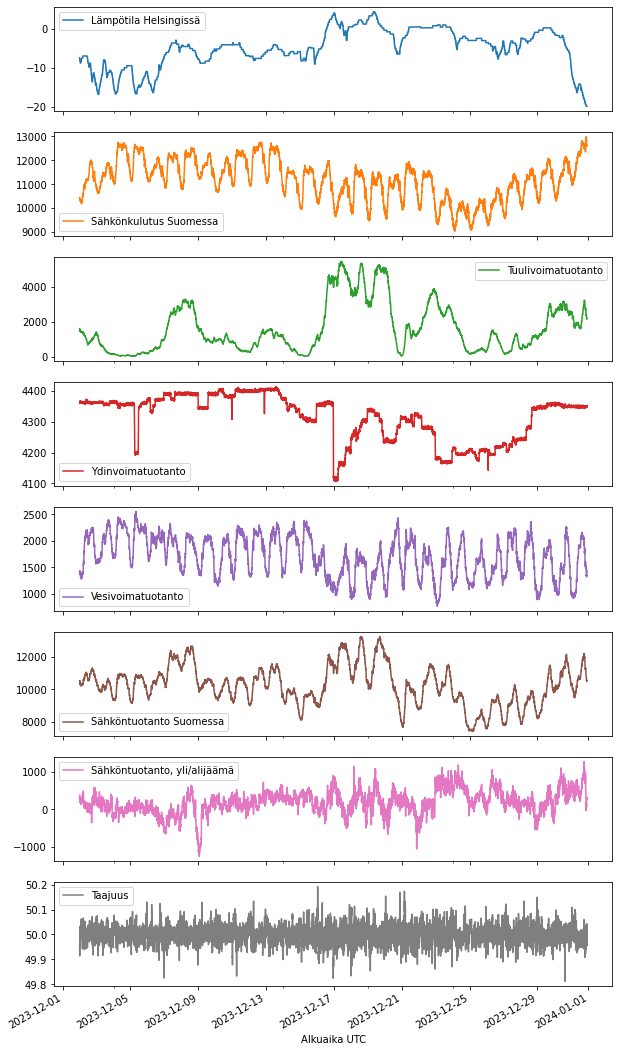

In [22]:
fg4 = fg2["2023-12-2":"2023-12-31"]
fg4.plot(subplots=True, figsize=(10,20))

In [23]:
len(fg4)

14349

In [24]:
fg4.drop(columns="Taajuus", inplace=True)
fg4.to_csv('./datasets/preprocessed/fingrid_20231202-31_3min.csv', index=False)

/tmp/ipykernel_172987/1728529469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg4.drop(columns="Taajuus", inplace=True)


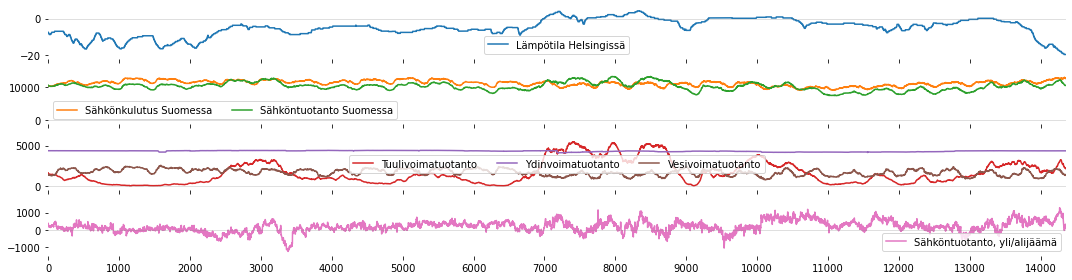

In [25]:
from datasets.plots import plot_datasets2
plot_datasets2(fg4, [(0,), (1,5), (2,3,4), (6,)])
plt.savefig(f"datasets/plots/elec.png", dpi=300)